# EDA ANALYSIS ON HealthLens-Understanding-Patient-Data-Health-Trends

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## IMPORTING DATASET FROM CSV FILE

In [15]:
df = pd.read_csv('cleaned_heart_cleveland_dataset.xls')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thalassemia,HeartDisease
0,69,Male,Typical Angina,160,234,>120 mg/dl,Left Ventricular Hypertrophy,131,No,0.1,Flat,1,Normal,No
1,69,Female,Typical Angina,140,239,≤120 mg/dl,Normal,151,No,1.8,Upsloping,2,Normal,No
2,66,Female,Typical Angina,150,226,≤120 mg/dl,Normal,114,No,2.6,Downsloping,0,Normal,No
3,65,Male,Typical Angina,138,282,>120 mg/dl,Left Ventricular Hypertrophy,174,No,1.4,Flat,1,Normal,Yes
4,64,Male,Typical Angina,110,211,≤120 mg/dl,Left Ventricular Hypertrophy,144,Yes,1.8,Flat,0,Normal,No


## 1. Distribution of Heart Disease amoung people

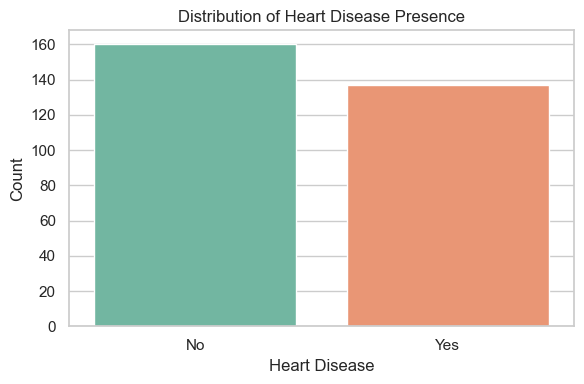

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='HeartDisease', palette='Set2')
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2. Gender Distribution Having Heart Disease

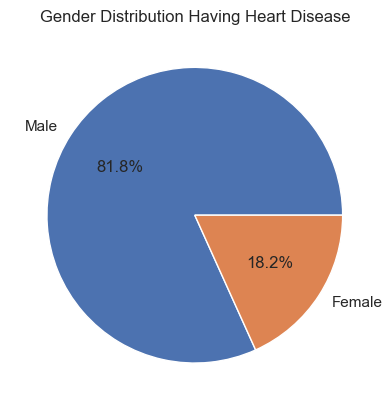

In [61]:
HeartDisease = df[df['HeartDisease'] == 'Yes']
gender_counts = HeartDisease['Sex'].value_counts()

labels = gender_counts.index

plt.pie(gender_counts, labels=labels, autopct='%1.1f%%',)
plt.title('Gender Distribution Having Heart Disease')
plt.show()

## 3. Factors Affecting Heart Disease

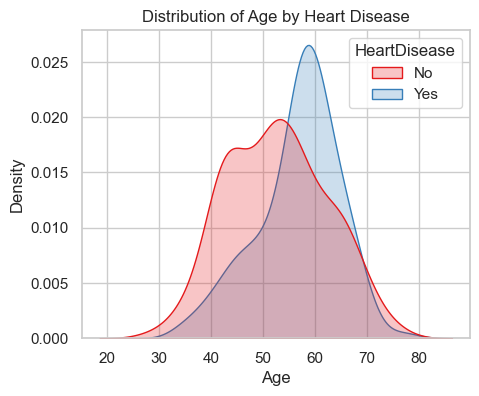

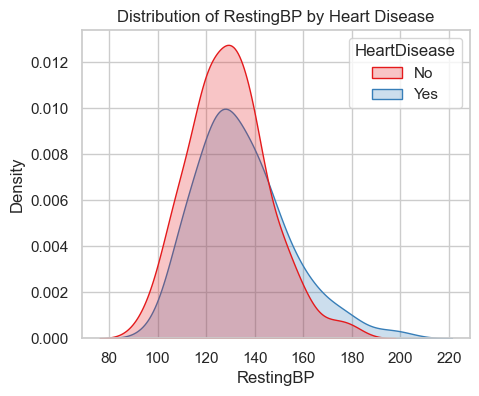

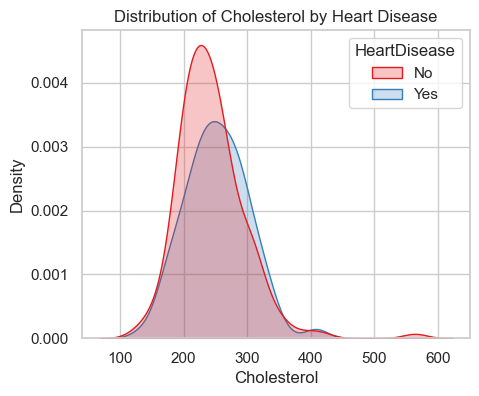

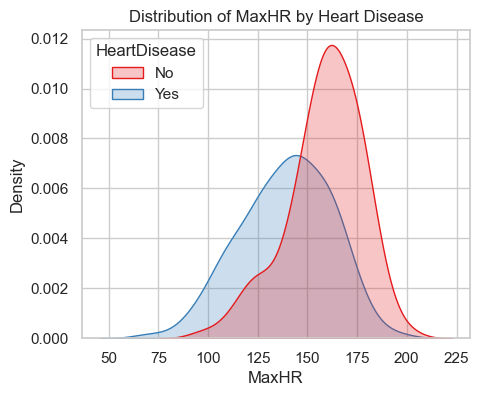

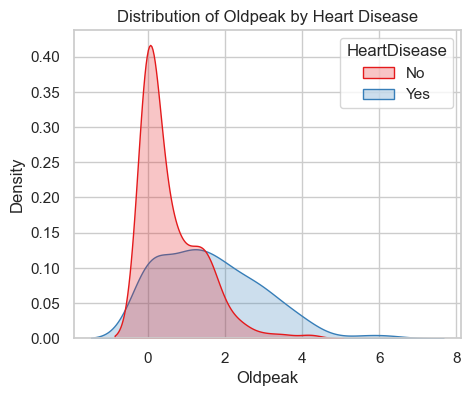

In [38]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    sns.kdeplot(data=df, x=col, hue='HeartDisease', fill=True, palette='Set1')
    plt.title(f'Distribution of {col} by Heart Disease')
    plt.show()

## 4. Outliers in Various Heart Disease Factors

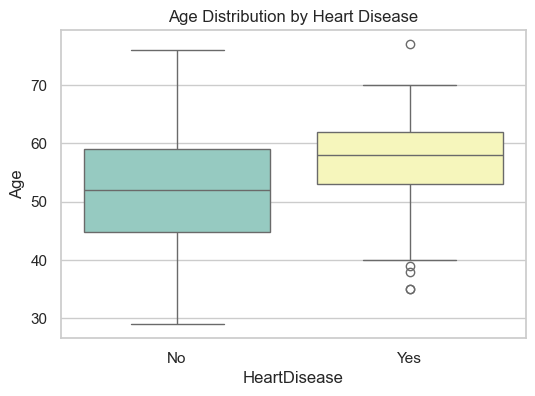

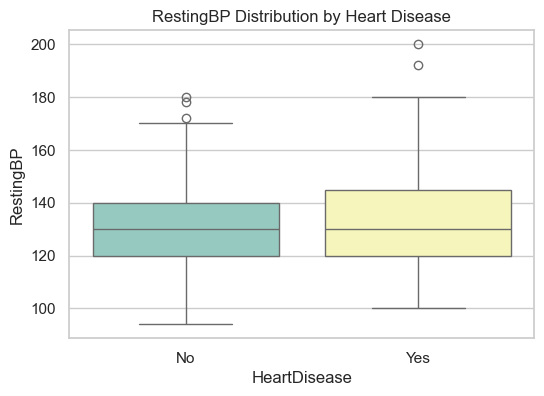

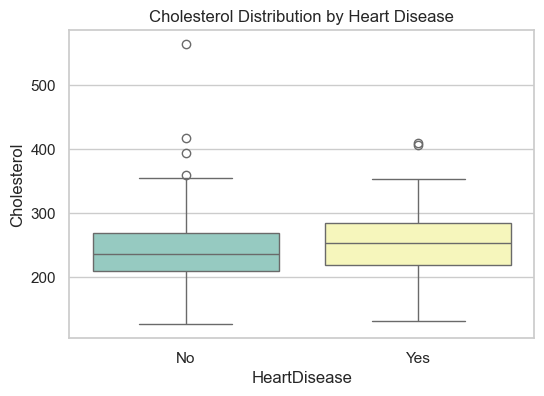

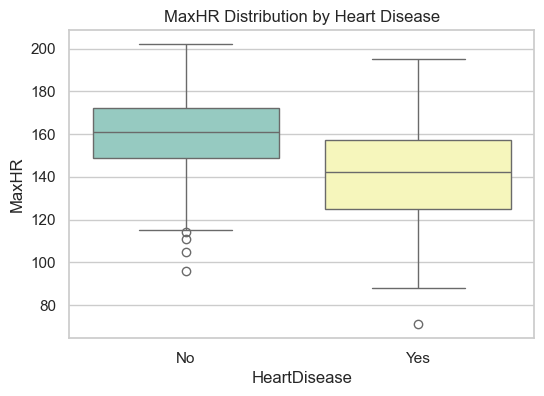

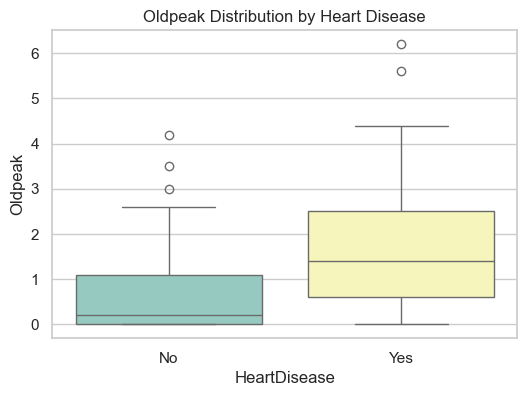

In [32]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='HeartDisease', y=col, palette='Set3')
    plt.title(f'{col} Distribution by Heart Disease')
    plt.show()

## 5. Outliers in Various Heart Disease Factors

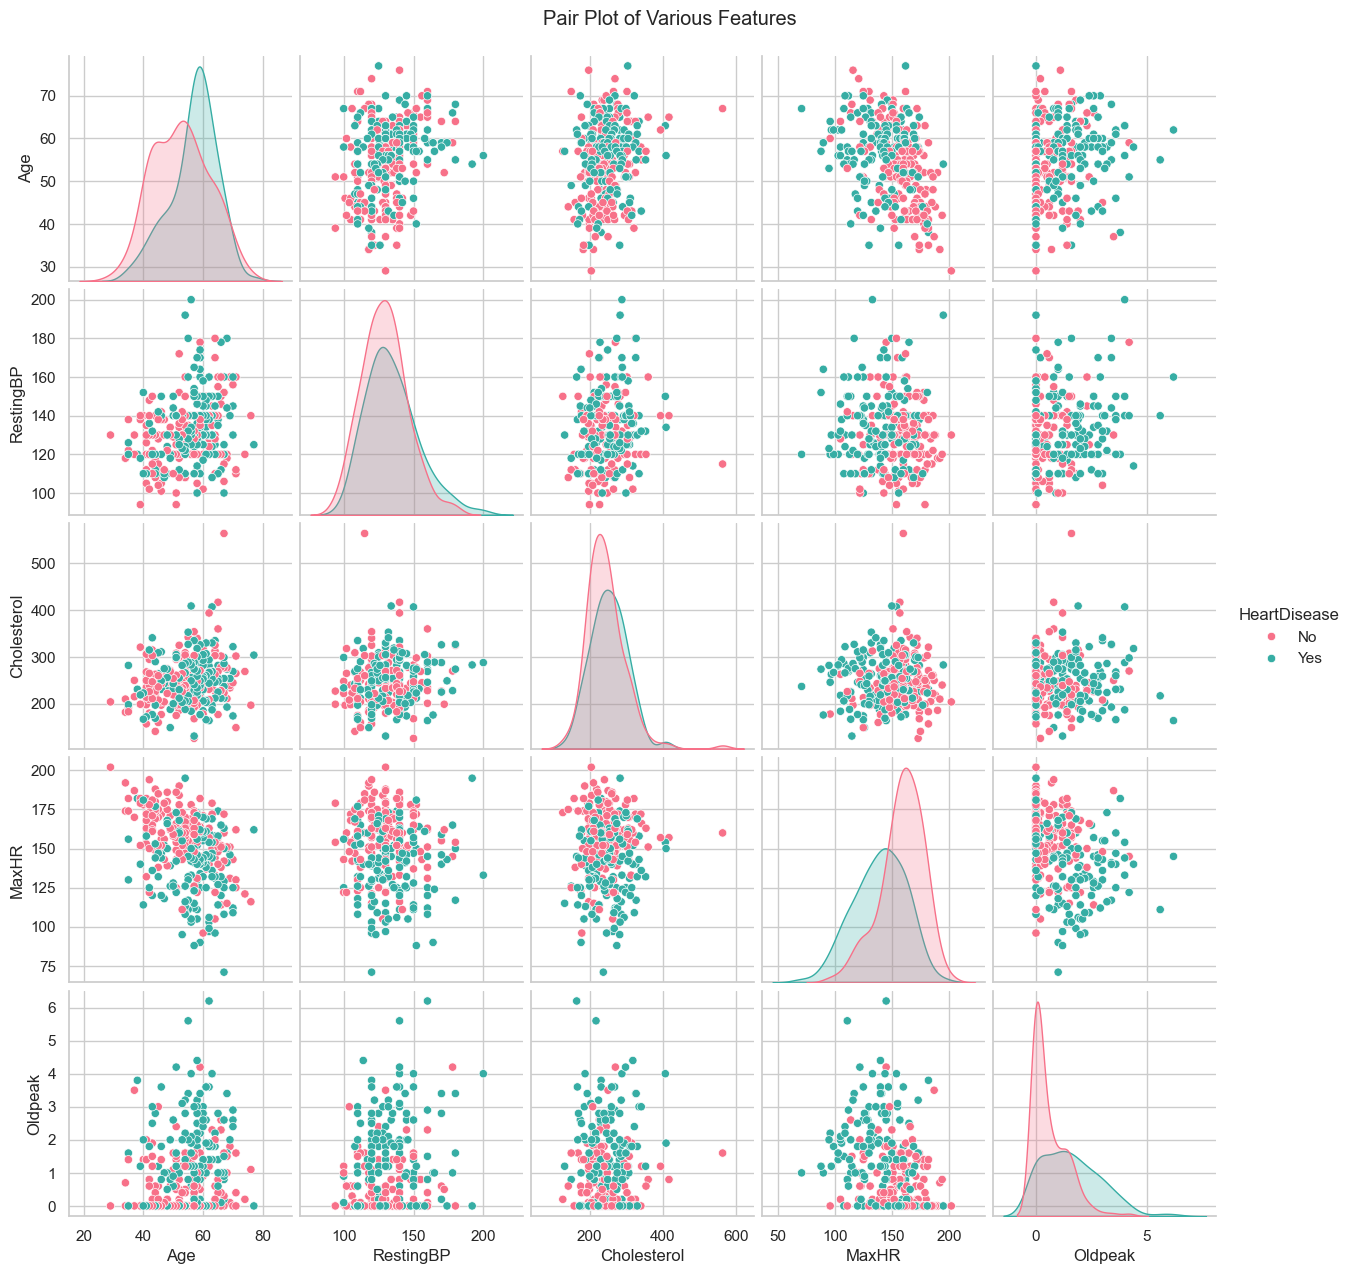

In [40]:
selected_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
sns.pairplot(df[selected_features], hue='HeartDisease', palette='husl')
plt.suptitle('Pair Plot of Various Features', y=1.02)
plt.show()